## Problem Set 3
Daniela Santos Cárdenas, Ana Brás Monteiro

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad, jacobian
import scipy.optimize as optimize
from scipy.optimize import minimize


In [4]:
# Import data 

df = pd.read_stata("../data/PS2_Data.dta")

# indiv - individual ID
# age
# SchD - schooling decision
# WhCoD - white collar work decision
# BlCoD - blue collar work decision
# SchE - school experience
# WhCoE - white collar work experience
# BlCoE - blue collar work experience


### Question 1
*Replicate Table 1 (choice distribution) and 2 (transition matrix) from Keane & Wolpin (1997). Reproduce a line graph similar to Figure 1, with a line for each career option.*

What can you say about the relationship between age and choices? What about persistence and state dependence? 

In [5]:
# Table 1 simply shows number of observations and percentages of individuals at each age that chose school, home, white-collar,  blue-collar, miilitary, total

table1 = df.groupby('age') \
        .agg(School_mean = ('SchD', 'mean'), School_sum = ('SchD', 'sum'), White_mean = ('WhCoD', 'mean'), White_sum = ('WhCoD', 'sum'), Blue_mean = ('BlCoD', 'mean'), Blue_sum = ('BlCoD', 'sum'), Total_mean = ('age', 'nunique'), Total_sum = ('age', 'count')) 

# Wasn't really figuring out how to do the total_mean, but this should just be =1, since it's just the sum of all the other %, so that just sums to 1

In [6]:
table1.columns =['School (Mean)', 'School (Sum)', 'White-Collar (Mean)', 'White-Collar (Sum)', 'Blue-Collar (Mean)', 'Blue-Collar (Sum)', 'Total (Mean)', 'Total(Sum)']

table1

,School (Mean),School (Sum),White-Collar (Mean),White-Collar (Sum),Blue-Collar (Mean),Blue-Collar (Sum),Total (Mean),Total(Sum)
age,,,,,,,,
1,0.442,221.0,0.266,133.0,0.292,146.0,1,500
2,0.398,199.0,0.284,142.0,0.318,159.0,1,500
3,0.370,185.0,0.330,165.0,0.300,150.0,1,500
4,0.328,164.0,0.356,178.0,0.316,158.0,1,500
5,0.298,149.0,0.354,177.0,0.348,174.0,1,500
6,0.244,122.0,0.390,195.0,0.366,183.0,1,500
7,0.244,122.0,0.354,177.0,0.402,201.0,1,500
8,0.190,95.0,0.390,195.0,0.420,210.0,1,500
9,0.182,91.0,0.392,196.0,0.426,213.0,1,500


In [7]:
# Table 2 is the transition matrix, so we need lags
df['LagSchD'] = df.groupby('indiv')['SchD'].shift(1)
df['LagWhCoD'] = df.groupby('indiv')['WhCoD'].shift(1)
df['LagBlCoD'] = df.groupby('indiv')['BlCoD'].shift(1)

In [8]:
# "The first figure in each cell is the percentage
# of transitions from origin to destination (the row percentage) and
# the second the reverse, that is, the percentage in a particular destination 
# who started from each origin (column percentage)."

# Row percentage

def table2_row(t , t_1):
    row = df.loc[(t == 1) & (t_1 == 1),].shape[0] / df.loc[(t_1 == 1) & (df.age !=1),].shape[0] 
    return row

# Column percentage

def table2_col(t , t_1):
    col = df.loc[(t == 1) & (t_1 == 1),].shape[0] / df.loc[(t == 1) & (df.age !=1),].shape[0] 
    return col



In [9]:
# Let's create our table 

table2 = pd.DataFrame()

for t_1 in [df.LagSchD, df.LagWhCoD, df.LagBlCoD]:
    row = []
    col = []

    for t in [df.SchD, df.WhCoD, df.BlCoD]:
        row.append(round(table2_row(t, t_1), 2))
        col.append(round(table2_col(t, t_1), 2))

    table2 = table2.append(pd.DataFrame(row).T)
    table2 = table2.append(pd.DataFrame(col).T)


In [10]:
# Naming columns and rows 
table2.columns = ['School', 'White Collar',
                'Blue Collar']

choices = ['School (Row)', 'School (Col)', 'White Collar (Row)', 'White Collar (Col)', 'Blue Collar (Row)', 'Blue Collar (Col)']
table2.insert(0, 'Choice (t-1)', choices)

In [220]:
table2

,Choice (t-1),School,White Collar,Blue Collar
0,School (Row),0.25,0.37,0.38
0,School (Col),0.28,0.31,0.31
0,White Collar (Row),0.27,0.41,0.31
0,White Collar (Col),0.36,0.39,0.30
0,Blue Collar (Row),0.27,0.32,0.41
0,Blue Collar (Col),0.36,0.31,0.40


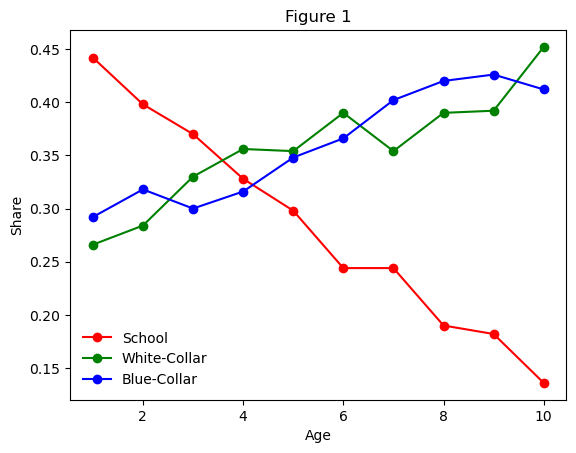

In [221]:
# Figure 1 percentage of people who chose school, wc and bc by age
table1.reset_index(inplace=True)

plt.plot(table1['age'], table1['School (Mean)'], color='red', marker='o')
plt.plot(table1['age'], table1['White-Collar (Mean)'], color='green', marker='o')
plt.plot(table1['age'], table1['Blue-Collar (Mean)'], color='blue', marker='o')
plt.title('Figure 1')
plt.xlabel('Age')
plt.ylabel('Share')
plt.legend(['School', 'White-Collar', 'Blue-Collar'], frameon = False)
plt.show()

The share of people in school decreases with age, naturally. At the same time, the share of people in white-collar and blue-collar jobs increases with age.

### Question 2

*Assume individuals make decisions based on a standard human capital model, where each career option gives them a period-specific reward. How would you structure these choice-specific reward functions based on the choice distribution and transition matrix you observe in the data?*

Not sure what to comment here, but I guess important points should be that rewards to work are increasing with time in the labor force. And probably returns to schooling decreasing. 



### Question 3

Reward functions:

$$R_s(a) = \beta_0 + \beta_1 I [g(a) \geq 12] + \epsilon_s(a)$$
$$R_w(a) = \alpha_1 g(a) + \alpha_2 x_w(a) + \alpha_3 x^2_w(a) + \epsilon_w(a)$$
$$R_b(a) = \eta_1 g(a) + \eta_2 x_b(a) + \eta_3 x^2_b(a) + \epsilon_b(a)$$

$g(a)$ is the school attainment at age $a$, $x_w(a)$, $x_b(a)$ are white and blue collar experience, and $\epsilon_k(a)$ are choice specific shocks distributed as type extreme value. 

Observed state space: $S(a) = [g(a), x_w(a), x_b(a)]$

Make a random guess of the parameters and find the alternative specific value functions for each possible path of choices and age, defined as:

$$V_k(S(a), a) = R_k(S(a), a) + \delta E[V(S(a+1), a+1) | S(a), d_k(a) = 1]\text{, for } a < A$$
$$V_k(S(A), A) = R_k(S(A), A)$$

$A$ is the last year of age in the sample and $d_k$ is the alternative-specific decision.

In [222]:
N = 500

# Schooling years and work experience
df['g_a'] = df.groupby('indiv')['SchD'].transform('sum')
df['x_w'] = df.groupby('indiv')['WhCoD'].transform('sum')
df['x_b'] = df.groupby('indiv')['BlCoD'].transform('sum')

In [223]:
def Rs(params_s, g_a):
    beta0 , beta1 = params_s
    return beta0 + beta1*(g_a>11) 

def Rw(params_w, g_a, x_w):
    alpha1, alpha2, alpha3 = params_w
    return alpha1*g_a + alpha2*x_w + alpha3*x_w**2 

def Rb(params_b, g_a, x_b):
    eta1, eta2, eta3 = params_b
    return eta1*g_a + eta2*x_b + eta3*x_b**2 


# Constants 
sigma = 0.95
γ = 0.57721566490153286061 # mean of extreme value type 1

In [224]:
value_functions = []

for i in range(10):

    def value_f(g_a, x_b, x_w, params_s, params_w, params_b, i = i):

        # Schooling 
        Vs = Rs(params_s, g_a) + sigma*value_functions[i-1](g_a + 1 , x_b, x_w, params_s, params_w, params_b)[0] if i > 0 else Rs(params_s, g_a)
        
        # White collar
        Vw = Rw(params_w, g_a, x_w) + sigma*value_functions[i-1](g_a , x_b, x_w + 1, params_s, params_w, params_b)[0] if i > 0 else Rw(params_w, g_a, x_w)
        
        # Blue collar
        Vb = Rb(params_b, g_a, x_b ) + sigma*value_functions[i-1](g_a , x_b + 1 , x_w, params_s, params_w, params_b)[0] if i > 0 else Rb(params_b, g_a, x_b )
        
        EMax = γ + np.log(np.sum(np.exp([Vs, Vw, Vb]), axis = 0)) # slide 73 - type 1 extreme value shocks
        
        return [EMax, Vs, Vw, Vb]  

    value_functions.append(value_f)


### Question 4 

*Use the full solution of the dynamic programming problem you just derived (inner loop) to
estimate the parameters of the reward functions by maximum likelihood (outer loop) (note: no
need for simulation here due to the distributional assumption of the shocks). Don’t estimate
the discount factor, just set it to δ = 0.95. Calculate the standard errors using finite difference approximation of the likelihood function at the estimated parameters (hint: you can use the same code provided for the infinite horizon single agent dynamic problem explained in class). Report your results. How do you interpret these coefficients? How does this compare to your interpretation of the descriptives in questions 1 and 2?*

In [171]:
# Likelihood Function 
def LL(params, df = df): 
    
    beta0, beta1, alpha1, alpha2, alpha3, eta1, eta2, eta3 = params

    beta= np.array([beta0, beta1])
    alpha = np.array([alpha1, alpha2, alpha3])
    eta = np.array([eta1,eta2,eta3])

    ll = 0

    for i in range(10):

        g_a = np.array(df.loc[df.age == 10 - i,'g_a']).reshape(1,N)
        x_b = np.array(df.loc[df.age == 10 - i,'x_b']).reshape(1,N)
        x_w = np.array(df.loc[df.age == 10 - i,'x_w']).reshape(1,N)

        # numerator
        num = np.array(np.concatenate(value_functions[i](g_a, x_b , x_w , beta, alpha, eta )[1:4])).T 
        # denominator
        den = np.array(np.concatenate(value_functions[i](g_a, x_b , x_w , beta, alpha, eta )[1:4])).T 
        # probabiility of decision at age a for each individual
        p_a = np.exp(np.sum(np.multiply(df.loc[df.age == 10 - i, ('SchD', 'WhCoD', 'BlCoD')], num), axis = 1))  / np.sum(np.exp(den), axis = 1) 
        
        ll += np.sum(np.log(p_a))

    ll = -1*ll

    return ll


In [ ]:
# takes very long to run
guess = [0.0, 0.0, 0.1, 0.1, -0.01, 0.1, 0.1, -0.01] 
MLE = minimize(LL, guess, method = 'BFGS', tol = 1e-6)

In [136]:
# Obtaining standard errors through inverse hessian

# Extract the Hessian matrix
inv_hess = MLE.hess_inv

# Extract the diagonal elements of the covariance matrix
diag_cov = np.diag(inv_hess)

# Compute the standard errors
std_errors = np.sqrt(diag_cov)

# Create a table with the coefficients and standard errors
coefficients = MLE.x
table = np.stack((coefficients, std_errors), axis=-1)
parameters = ["β_0", "β_1", "α_1", "α_2", "α_3", "η_1", "η_2", "η_3"]
results = pd.DataFrame(table, parameters)
results.columns = ['Coefficient', 'SE']

results

,Coefficient,SE
β_0,0.910235,0.027974
β_1,0.000189,0.016914
α_1,0.234336,0.016915
α_2,0.181244,0.008552
α_3,0.004581,0.001315
η_1,0.228755,0.018061
η_2,0.188102,0.008960
η_3,0.004003,0.001298


As expected, both occupations have positive returns to schooling. However, the difference is not a lot between the returns to schooling for white collar vs blue collar workers. The linear component of the returns to experience is also very similiar between the two occupations. The cuadratic component is close to zero, meaning the returns to experience are almost linear in time. The returns to after high school education seems to be close to nothing, so it makes sense that the curve in Figure 1 is downwards sloping.

### Question 5 

*Estimate the model now with unobserved heterogeneity. Assume there are 2 types of individuals in the sample, who differ in the effect of schooling on rewards from working. One type
has a higher return from schooling in a white collar job and a lower return in a blue collar one,
as she specialized in managerial studies, whereas the opposite is true for the other type, who
specialized in a more blue collar oriented education. Don’t estimate type proportions but just
set them equal to 0.5. Report estimated coefficients and standard errors. How do your results
compare with the previous question? How much does unobserved heterogeneity matter?*

In [ ]:
# One type has a higher return from schooling in a white collar job - different alpha1
# The other has a higher return from schooling in a blue collar job - different eta1
# Other parameters are the same for both types 

In [184]:
def LL_UH(params, df = df): 
    
    beta0, beta1, alpha1_t1, alpha1_t2, alpha2, alpha3, eta1_t1, eta1_t2, eta2, eta3 = params

    beta= np.array([beta0, beta1])
    alpha_v1 = np.array([alpha1_t1, alpha2, alpha3])
    eta_v1 = np.array([eta1_t1,eta2,eta3])
    alpha_v2 = np.array([alpha1_t2, alpha2, alpha3])
    eta_v2 = np.array([eta1_t2,eta2,eta3])

    ll_t1 = np.ones(500)
    ll_t2 = np.ones(500)

    for i in range(10):

        ga = np.array(df.loc[df.age == 10 - i,'g_a']).reshape(1,N)
        xb = np.array(df.loc[df.age == 10 - i,'x_b']).reshape(1,N)
        xw = np.array(df.loc[df.age == 10 - i,'x_w']).reshape(1,N)

        # Type 1
        # numerator and denominator
        num_t1 = np.array(np.concatenate(value_functions[i](ga, xb , xw , beta, alpha_v1, eta_v1 )[1:4])).T 
        den_t1 = np.array(np.concatenate(value_functions[i](ga, xb , xw , beta, alpha_v1, eta_v1 )[1:4])).T 
        # Probability of decision
        p_a_v1 = np.exp(np.sum(np.multiply(df.loc[df.age == 10 - i, ('SchD', 'WhCoD', 'BlCoD')], num_t1), axis = 1))  / np.sum(np.exp(den_t1), axis = 1) 

        # Type 2
        # numerator and denominator
        num_t2 = np.array(np.concatenate(value_functions[i](ga, xb , xw , beta, alpha_v2, eta_v2 )[1:4])).T 
        den_t2 = np.array(np.concatenate(value_functions[i](ga, xb , xw , beta, alpha_v2, eta_v2 )[1:4])).T 
        # Probabiility of decision
        p_a_v2 = np.exp(np.sum(np.multiply(df.loc[df.age == 10 - i, ('SchD', 'WhCoD', 'BlCoD')], num_t2), axis = 1))  / np.sum(np.exp(den_t2), axis = 1) 

        # Log-likelihood
        ll_t1 = np.multiply(ll_t1.reshape(500,1), np.array(p_a_v1).reshape(500,1)) 
        ll_t2 = np.multiply(ll_t2.reshape(500,1), np.array(p_a_v2).reshape(500,1))

    ll = -1 * np.sum(np.log(0.5 * ll_t1 + 0.5 * ll_t2)) # set type proportions equal to 0.5

    return ll

In [ ]:
guess = [1.0, -1.0, 0.1, 0.1, 0.1, -0.1, 0.1, 0.1, 0.1, -0.1] 
MLE_UH = minimize(LL_UH, guess, method = 'BFGS', tol = 1e-3)

# It ran for one hour, no convergence 



### Question 6 
*Produce 3 graphs similar to the one you did in question 1, one for each career decision. In
these graphs plot a line for the actual data, and two the model’s prediction both with and
without unobserved heterogeneity. Use the predicted probabilities to construct the lines for
the two models. Which model seems to fit the data better?*

In [255]:
def prob(params, df=df):
    beta0, beta1, alpha1, alpha2, alpha3, eta1, eta2, eta3 = params
    Beta = np.array([beta0, beta1])
    alpha = np.array([alpha1, alpha2, alpha3])
    Eta = np.array([eta1, eta2, eta3])

    pred_prob = []
    for i in range(10):
        ga = np.array(df[df['age'] == 10 - i]['g_a'])
        xb = np.array(df[df['age'] == 10 - i]['x_b'])
        xw = np.array(df[df['age'] == 10 - i]['x_w'])

        utility = value_functions[i](ga, xb, xw, Beta, alpha, Eta)[1:]
        prob = np.exp(utility) / np.sum(np.exp(utility), axis=0)
        mean_prob = np.mean(prob, axis=1)
        pred_prob.append(mean_prob)

    return pred_prob

In [256]:
list_pred = list(map(lambda x: [x], prob(MLE.x)))
pred_prob = pd.DataFrame(np.concatenate(list_pred))
pred_prob.columns = ['School', 'White-Collar', 'Blue-Collar']
pred_prob

,School,White-Collar,Blue-Collar
0,0.224657,0.386765,0.388578
1,0.237625,0.380145,0.382230
2,0.249497,0.374132,0.376370
3,0.260003,0.368870,0.371127
4,0.269344,0.364324,0.366332
5,0.279313,0.359932,0.360755
6,0.293019,0.353360,0.353621
7,0.311757,0.343430,0.344814
8,0.333075,0.331654,0.335271
9,0.353664,0.320020,0.326316


Because the minimization didn't converge for the unobserved heterogeneity case, we're only presenting results for the case without unobserved heterogeneity.

NameError: name 'pred2' is not defined

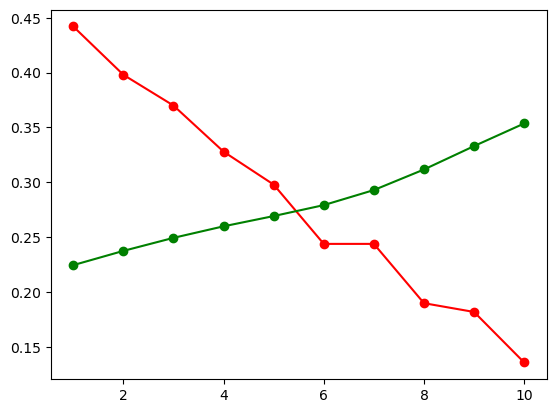

In [257]:
# Graph Schooling - Results look wrong, but we tried :(

plt.plot(table1['age'], table1['School (Mean)'], color='red', marker='o')
plt.plot(table1['age'], pred_prob['School'], color='green', marker='o')
plt.plot(table1['age'], pred2['School'], color='blue', marker='o')
plt.title('Schooling Decision')
plt.xlabel('Age')
plt.ylabel('Share')
plt.legend(['Data', 'Without UH', 'With UH'], frameon = False)
plt.show()

NameError: name 'pred2' is not defined

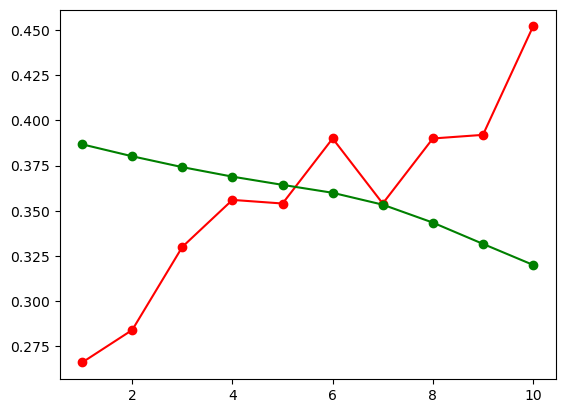

In [258]:
# Graph White-Collar

plt.plot(table1['age'], table1['White-Collar (Mean)'], color='red', marker='o')
plt.plot(table1['age'], pred_prob['White-Collar'], color='green', marker='o')
plt.plot(table1['age'], pred2['White-Collar'], color='blue', marker='o')
plt.title('White-Collar Decision')
plt.xlabel('Age')
plt.ylabel('Share')
plt.legend(['Data', 'Without UH', 'With UH'], frameon = False)
plt.show()

NameError: name 'pred2' is not defined

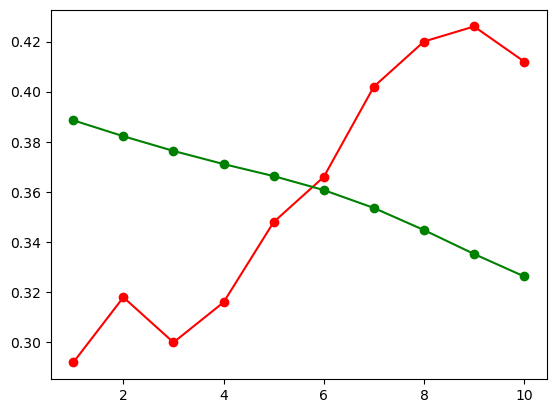

In [259]:
# Graph Blue-Collar

plt.plot(table1['age'], table1['Blue-Collar (Mean)'], color='red', marker='o')
plt.plot(table1['age'], pred_prob['Blue-Collar'], color='green', marker='o')
plt.plot(table1['age'], pred2['Blue-Collar'], color='blue', marker='o')
plt.title('Blue-Collar Decision')
plt.xlabel('Age')
plt.ylabel('Share')
plt.legend(['Data', 'Without UH', 'With UH'], frameon = False)
plt.show()

Clearly, these results don't seem very correct, as the actual data and prediction are almost opposite. We really tried to figure out what was wrong with our code, but we were not able to. 